In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import preprocessing
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
import numpy as np

In [48]:
# Configure the CNN (Convolutional Neural Network).

classifier = Sequential()

# Convolution - extracting appropriate features from the input image.
# Non-Linearity (RELU) - replacing all negative pixel values in feature map by zero.

classifier.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3),
               activation='relu'))

# Pooling: reduces dimensionality of the feature maps but keeps the most important information.

classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer and flattening in order to arrange 3D volumes into a 1D vector.

classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())

# Fully connected layers: ensures connections to all activations in the previous layer.

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=2, activation='sigmoid'))

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [50]:
train_datagen=ImageDataGenerator(rescale=1. / 255, shear_range=0.2,
        zoom_range=0.2, horizontal_flip=True)
train_generator=train_datagen.flow_from_directory('Data/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 253 images belonging to 2 classes.


In [51]:
print(train_generator.n)
print(train_generator.batch_size)
print(253//32)

253
32
7


In [52]:
classifier.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [53]:
step_size_train=train_generator.n//train_generator.batch_size
r = classifier.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=20)

Epoch 1/20
7/7 [==============================] - 26s 4s/step - loss: 3.7076 - accuracy: 0.5814
Epoch 2/20
7/7 [==============================] - 22s 3s/step - loss: 0.8973 - accuracy: 0.6041
Epoch 3/20
7/7 [==============================] - 22s 3s/step - loss: 0.6577 - accuracy: 0.6964
Epoch 4/20
7/7 [==============================] - 22s 3s/step - loss: 0.6296 - accuracy: 0.6606
Epoch 5/20
7/7 [==============================] - 23s 3s/step - loss: 0.5384 - accuracy: 0.7366
Epoch 6/20
7/7 [==============================] - 24s 3s/step - loss: 0.5081 - accuracy: 0.7500
Epoch 7/20
7/7 [==============================] - 24s 3s/step - loss: 0.4597 - accuracy: 0.8058
Epoch 8/20
7/7 [==============================] - 25s 4s/step - loss: 0.4334 - accuracy: 0.8122
Epoch 9/20
7/7 [==============================] - 24s 3s/step - loss: 0.4241 - accuracy: 0.8054
Epoch 10/20
7/7 [==============================] - 27s 4s/step - loss: 0.4005 - accuracy: 0.8036
Epoch 11/20
7/7 [======================

dict_keys(['loss', 'accuracy'])


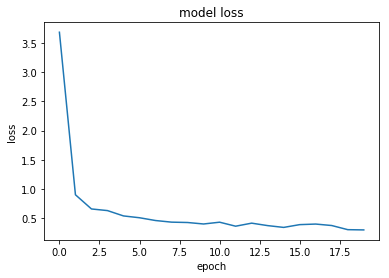

In [54]:
# Plot training and validation loss/accuracy
import matplotlib.pyplot as plt
print(r.history.keys())
# Loss
plt.plot(r.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

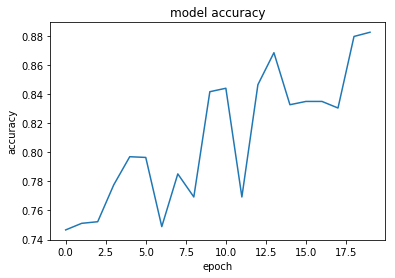

In [47]:
plt.plot(r.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()